In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

In [5]:
df_train=pd.read_excel('Data_Train.xlsx')
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [6]:
df_train['Mileage']=df_train['Mileage'].astype(str).str.replace('km/kg','').str.replace('kmpl','').astype(float)
df_train['Engine']=df_train['Engine'].astype(str).str.replace('CC','').astype(float)
df_train['Power']=df_train['Power'].astype(str).str.replace('bhp','').str.replace('null','NaN').astype(float)
new = df_train["Name"].str.split(" ", n = 1, expand = True)
df_train["Brand"]= new[0]
df_train['Model']=new[1]
df_train.drop(['Name'],axis=1,inplace=True)
print(df_train.head())
df_train=df_train.interpolate(method ='linear', limit_direction ='forward')
print(df_train.describe())
print(df_train.isnull().sum())
x=df_train.copy()

     Location  Year  Kilometers_Driven Fuel_Type Transmission Owner_Type  \
0      Mumbai  2010              72000       CNG       Manual      First   
1        Pune  2015              41000    Diesel       Manual      First   
2     Chennai  2011              46000    Petrol       Manual      First   
3     Chennai  2012              87000    Diesel       Manual      First   
4  Coimbatore  2013              40670    Diesel    Automatic     Second   

   Mileage  Engine   Power  Seats  Price    Brand                       Model  
0    26.60   998.0   58.16    5.0   1.75   Maruti             Wagon R LXI CNG  
1    19.67  1582.0  126.20    5.0  12.50  Hyundai    Creta 1.6 CRDi SX Option  
2    18.20  1199.0   88.70    5.0   4.50    Honda                      Jazz V  
3    20.77  1248.0   88.76    7.0   6.00   Maruti                  Ertiga VDI  
4    15.20  1968.0  140.80    5.0  17.74     Audi  A4 New 2.0 TDI Multitronic  
              Year  Kilometers_Driven      Mileage       Engine

In [7]:
col=['Year','Mileage','Engine','Power','Seats','Price']
for i in col:
    Q1 = x['{}'.format(i)].quantile(0.25)
    Q3 = x['{}'.format(i)].quantile(0.75)
    IQR = Q3 - Q1
    m1=Q1 - (1.5 * IQR)
    m2=Q3 + (1.5 * IQR)
    k2=x.loc[x['{}'.format(i)]>=m2, '{}'.format(i)].median()
    k1=x.loc[x['{}'.format(i)]<=m1, '{}'.format(i)].median()
    x.loc[x['{}'.format(i)]>=m2, '{}'.format(i)]=k2
    x.loc[x['{}'.format(i)]<=m1, '{}'.format(i)]=k1

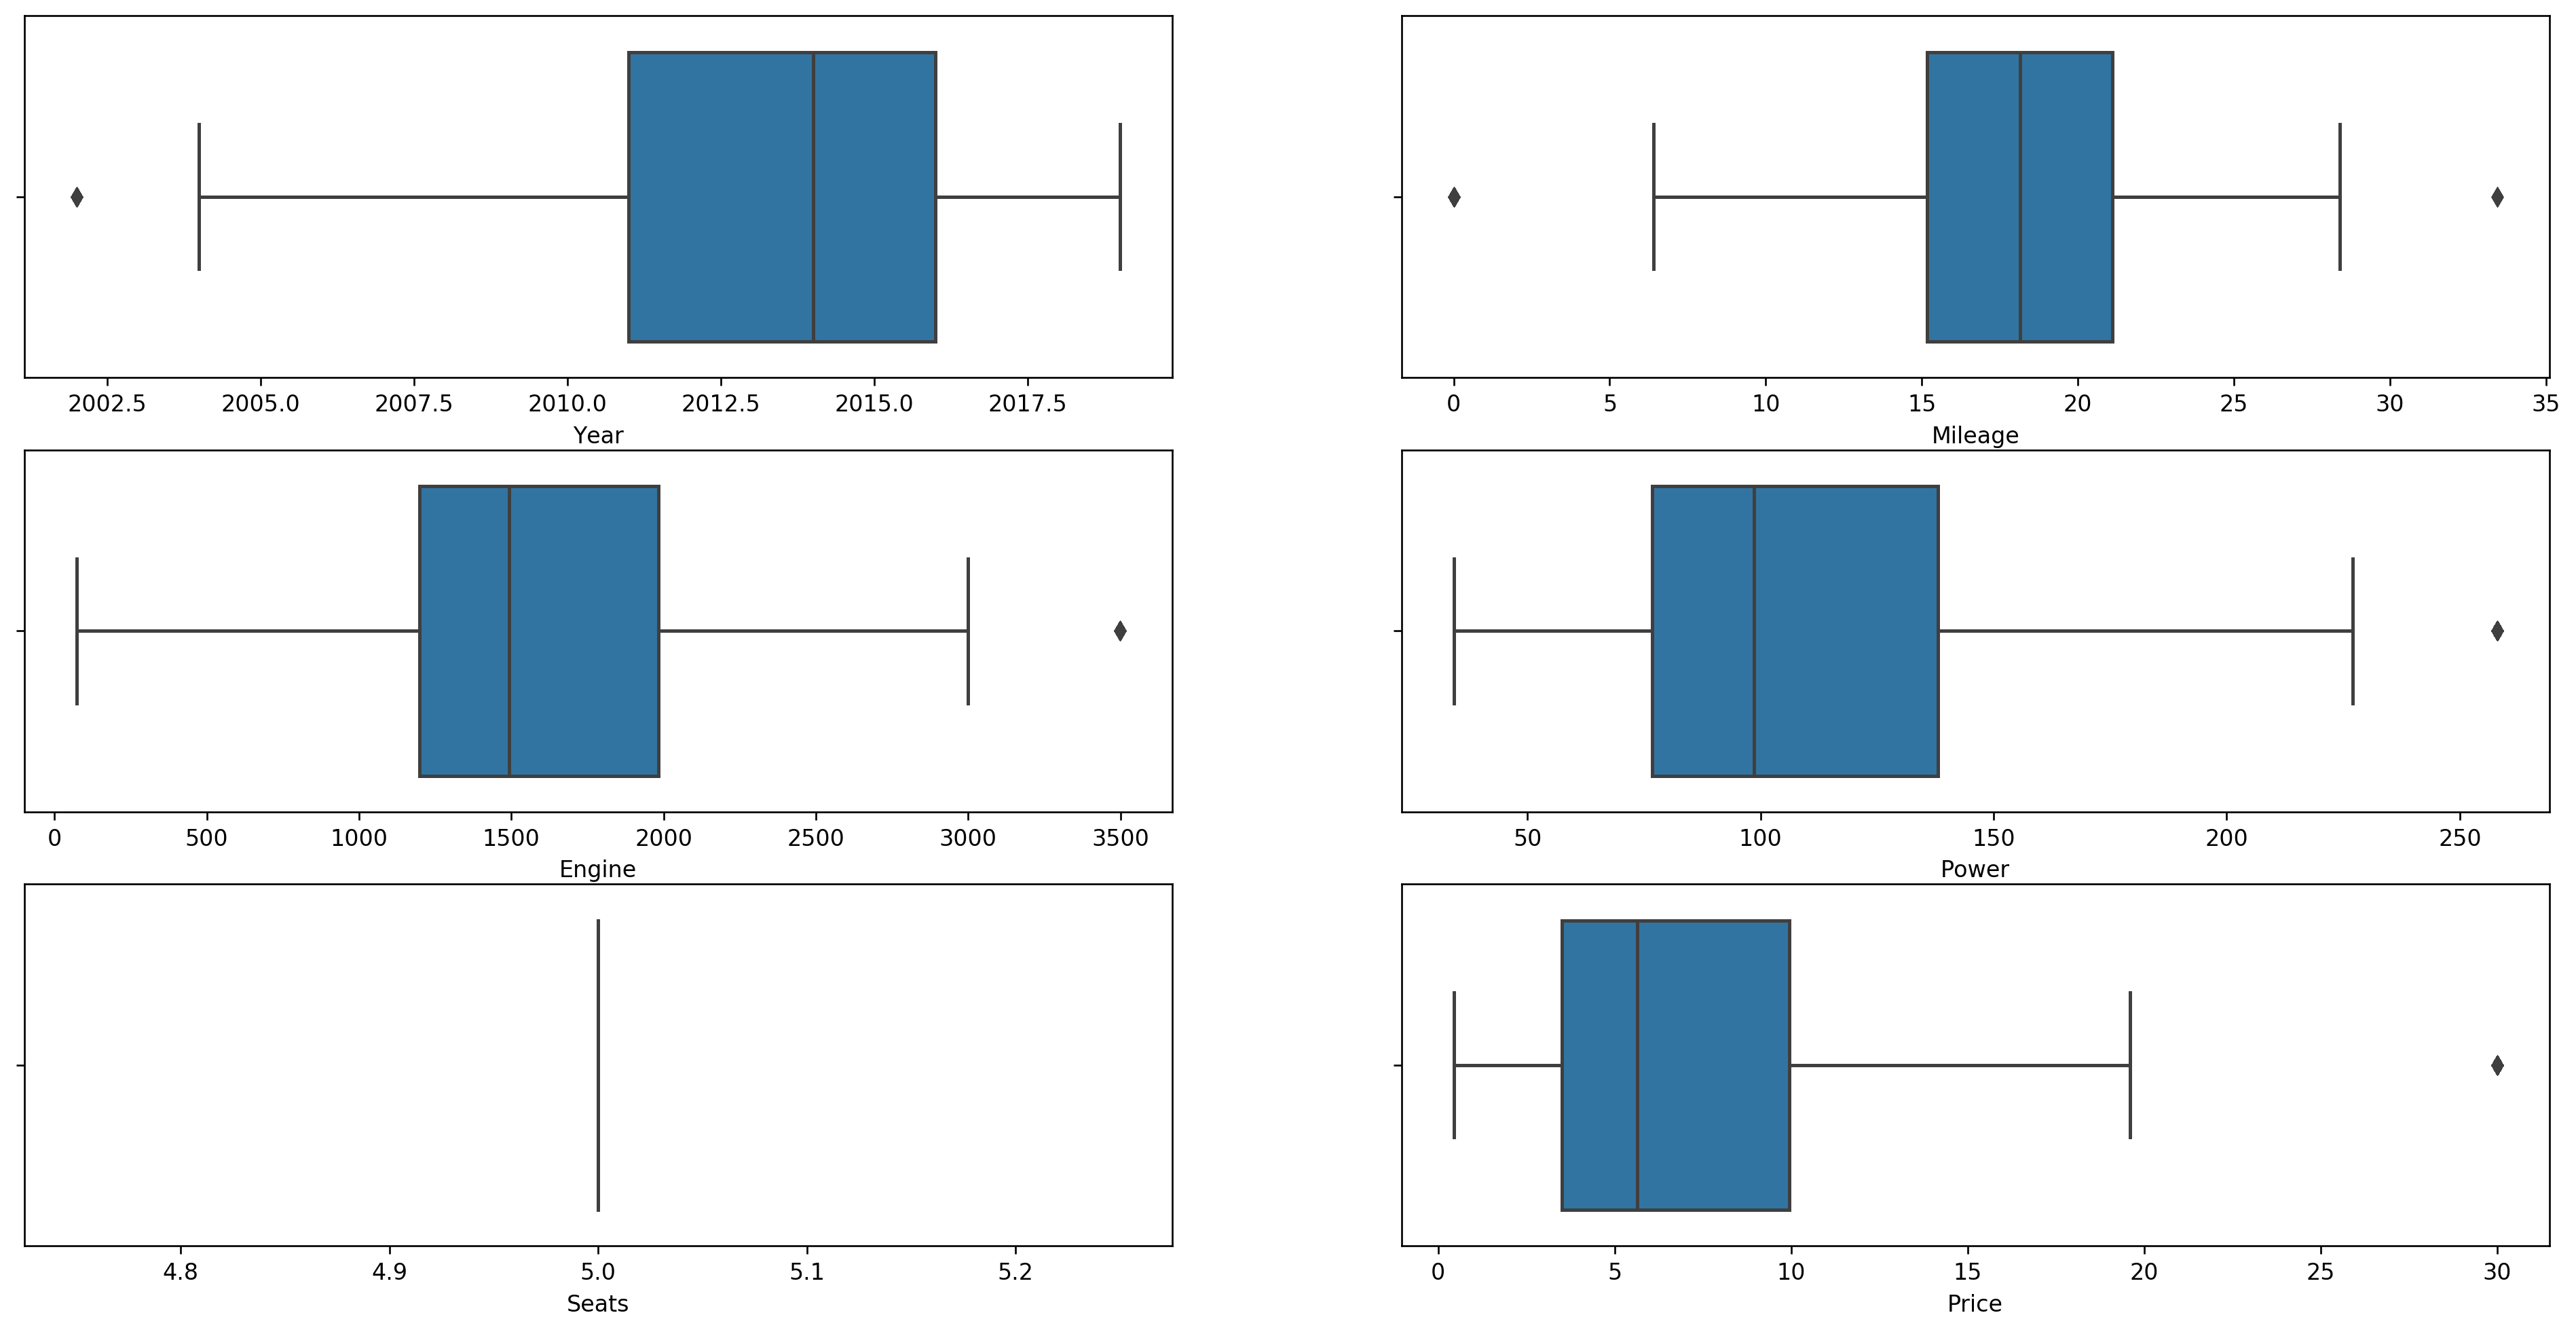

In [8]:
plt.figure(figsize=(20,10),dpi=240)
plt.subplot(3,2,1)
sns.boxplot(x["Year"])
plt.subplot(3,2,2)
sns.boxplot(x['Mileage'])
plt.subplot(3,2,3)
sns.boxplot(x['Engine'])
plt.subplot(3,2,4)
sns.boxplot(x['Power'])
plt.subplot(3,2,5)
sns.boxplot(x['Seats'])
plt.subplot(3,2,6)
sns.boxplot(x['Price'])
plt.show()

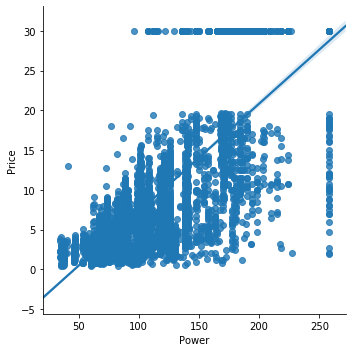

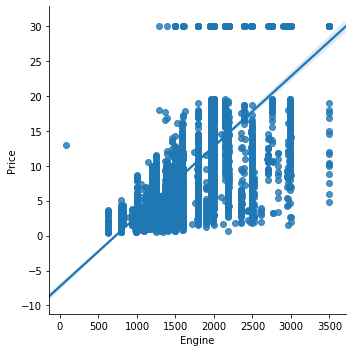

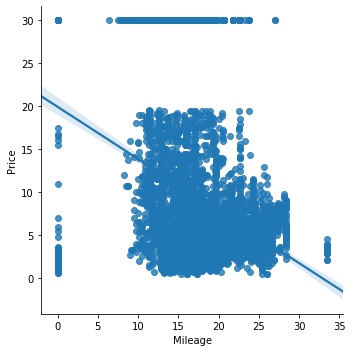

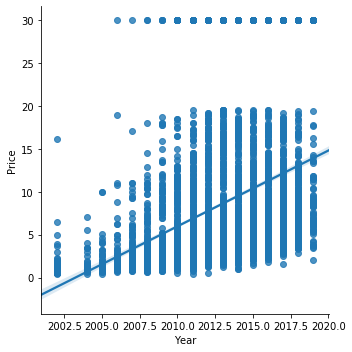

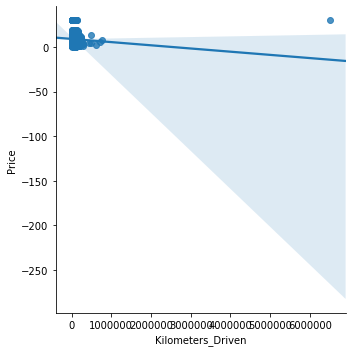

In [9]:
col=['Power','Engine','Mileage','Year','Kilometers_Driven']
for i in col: 
    sns.lmplot(y='Price',x='{}'.format(i),data=x)
    plt.show()

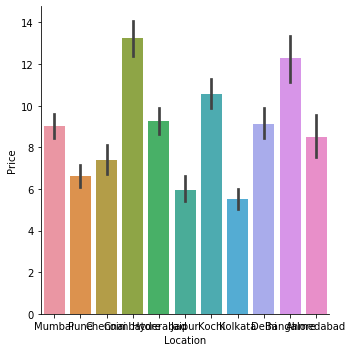

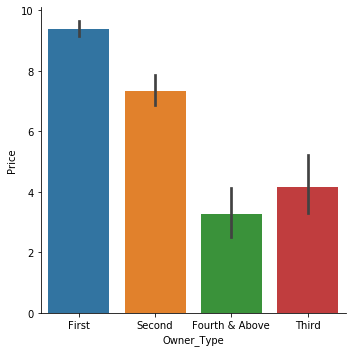

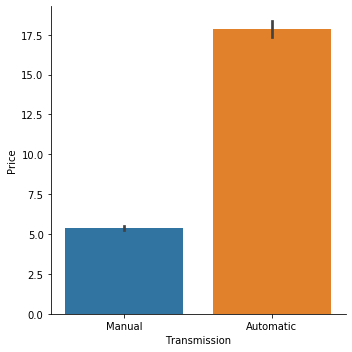

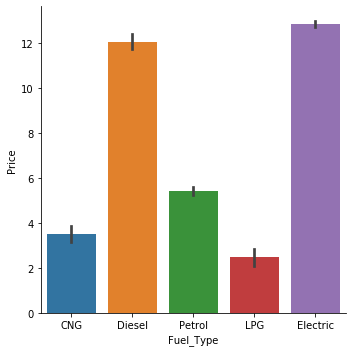

In [10]:
col=['Location','Owner_Type','Transmission','Fuel_Type']
for i in col:
    sns.catplot(x='{}'.format(i), y="Price", kind="bar", data=x)
    plt.show()

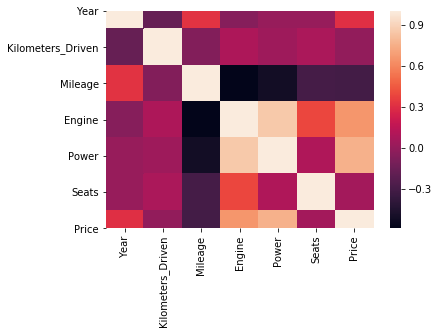

In [11]:
sns.heatmap(df_train.corr())
plt.show()

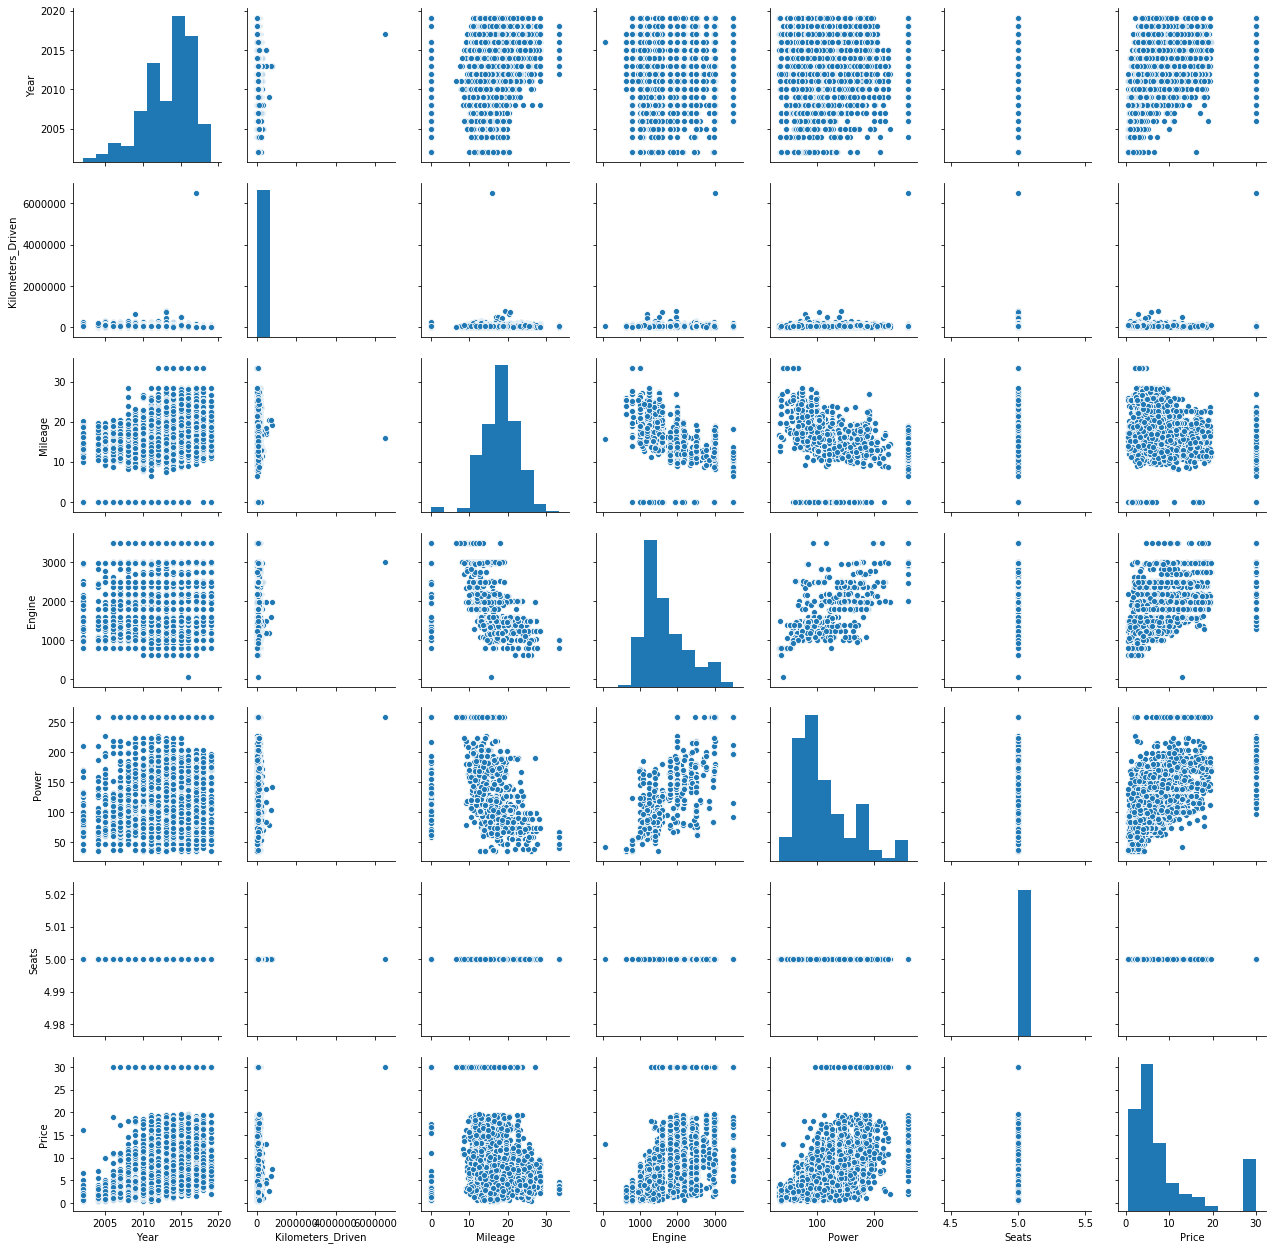

In [12]:
sns.pairplot(x)
plt.show()

In [13]:
x.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Brand,Model
0,Mumbai,2010.0,72000,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75,Maruti,Wagon R LXI CNG
1,Pune,2015.0,41000,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50,Hyundai,Creta 1.6 CRDi SX Option
2,Chennai,2011.0,46000,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50,Honda,Jazz V
3,Chennai,2012.0,87000,Diesel,Manual,First,20.77,1248.0,88.76,5.0,6.00,Maruti,Ertiga VDI
4,Coimbatore,2013.0,40670,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74,Audi,A4 New 2.0 TDI Multitronic


In [14]:
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
Location             6019 non-null object
Year                 6019 non-null float64
Kilometers_Driven    6019 non-null int64
Fuel_Type            6019 non-null object
Transmission         6019 non-null object
Owner_Type           6019 non-null object
Mileage              6019 non-null float64
Engine               6019 non-null float64
Power                6019 non-null float64
Seats                6019 non-null float64
Price                6019 non-null float64
Brand                6019 non-null object
Model                6019 non-null object
dtypes: float64(6), int64(1), object(6)
memory usage: 611.4+ KB
None


In [15]:
y=x['Price'].copy()
x.drop(['Price'],axis=1,inplace=True)
col=['Location','Fuel_Type','Transmission','Owner_Type',"Model",'Brand']
ohe=OneHotEncoder(sparse=False)
for i in col:
    print(ohe.fit_transform(x[['{}'.format(i)]]).shape)

(6019, 11)
(6019, 5)
(6019, 2)
(6019, 4)
(6019, 1876)
(6019, 31)


In [16]:
column_trans=make_column_transformer((OneHotEncoder(),['Location','Fuel_Type','Transmission','Owner_Type','Model','Brand']),remainder='passthrough')
data=column_trans.fit_transform(x)

In [17]:
#linear regression model
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=100)

R-squared: 0.8934768121882068


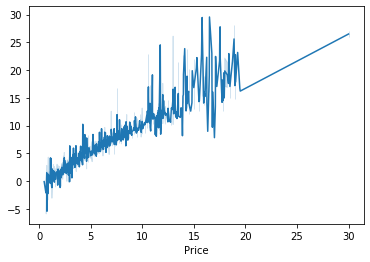

In [18]:
#without cross_validation
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
sns.lineplot(y_test,y_pred)
plt.show()

In [43]:
#with cross_validation
regressor = LinearRegression()  
scores = cross_val_score(regressor, X_train, y_train, cv=12)
scores.mean()

0.8719900142066042

In [20]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.13)


In [21]:
#svm model
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.3, random_state=100)

C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


0.2565176262143747


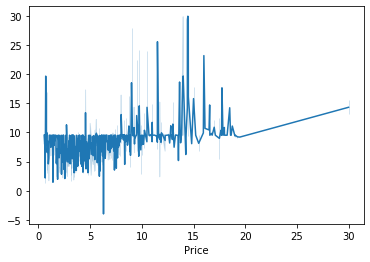

In [39]:
#without cross_validation
clf = SVR(C=100)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
r_2 = r2_score(y_test,y_pred)
print(r_2)
sns.lineplot(y_test,y_pred)
plt.show()

In [42]:
#with cross_validation
clf=SVR(C=100)
scores = cross_val_score(clf, X_train, y_train, cv=19)
scores.mean()

C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Meghaa\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureW

0.2722298032691604

In [36]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.27 (+/- 0.12)


0.4525510861300188


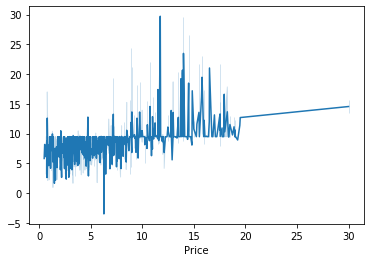

In [25]:
#knn model
#without cross_validation
knn = KNeighborsRegressor(n_neighbors=50,weights='uniform',p=1)
knn.fit(X_train,y_train)
y_preds = knn.predict(X_test)
print(r2_score(y_test,y_preds))
sns.lineplot(y_test,y_pred)
plt.show()

In [26]:
#with cross_validation
knn = KNeighborsRegressor(n_neighbors=50,weights='uniform',p=1)
scores = cross_val_score(knn, X_train, y_train, cv=16)
scores

array([0.39910921, 0.40111056, 0.37367784, 0.32804882, 0.45326502,
       0.40755696, 0.3725901 , 0.37740183, 0.38190351, 0.36234719,
       0.39572064, 0.46880807, 0.40258007, 0.45790985, 0.35318477,
       0.41787065])

In [27]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.40 (+/- 0.07)


In [37]:
data

<6019x1935 sparse matrix of type '<class 'numpy.float64'>'
	with 72160 stored elements in Compressed Sparse Row format>

In [28]:
#random forest  model
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.2, random_state=49)

R-squared: 0.876527040577751


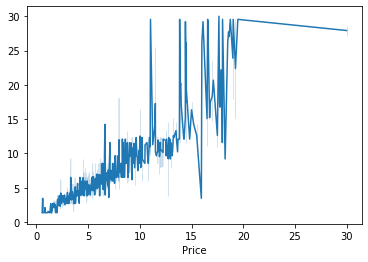

In [29]:
#without cross_validation
base_model = DecisionTreeRegressor(max_depth=8)
base_model.fit(X_train, y_train)
y_pred = base_model.predict(X_test)
print("R-squared:", r2_score(y_test, y_pred))
sns.lineplot(y_test,y_pred)
plt.show()

In [44]:
#with cross_validation
base_model = DecisionTreeRegressor(max_depth=8)
scores = cross_val_score(base_model, X_train, y_train, cv=10)
scores.mean()

0.8610050178345554

In [31]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.86 (+/- 0.04)
